In [54]:
import tensorflow as tf

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [57]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
#Divide the dataset into independent and dependent features

In [59]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [60]:
#Feature Engineering
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [61]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [62]:
X=X.drop(['Geography','Gender'],axis=1)

In [63]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [64]:
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
#X_train,X_test

In [71]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213, -1.41636539, -0.69539349, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282,  0.3900109 ,  1.03972843, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [72]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ..., -1.54035103,
        -1.02583358, -1.01960511],
       [-0.29729735,  0.3900109 , -1.38944225, ...,  0.64920267,
         0.97481699,  0.79888291],
       [-0.52560743,  0.48508334, -0.3483691 , ...,  0.64920267,
        -1.02583358, -0.72797953],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ...,  0.64920267,
        -1.02583358, -1.16591585],
       [ 0.41876609, -0.94100321, -0.3483691 , ...,  0.64920267,
        -1.02583358, -0.41163463],
       [-0.24540869,  0.00972116, -1.38944225, ...,  0.64920267,
         0.97481699,  0.12593183]])

In [73]:
X_train.shape

(8000, 8)

In [74]:
#Lets create the ANN

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [79]:
#Let's initialize the ANN
classifier=Sequential()

In [80]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu')) #11=number of inputs

# adding 1st hidden layer
classifier.add(Dense(units=7,activation='relu'))

# adding 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))

#Adding the output layer
classifier.add(Dense(1,activation='sigmoid')) #sigmoid because this is binary classification problem

In [86]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #by default adam provides a learning rate of 0.01

In [84]:
#To initialize learning rate:
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [97]:
## Early Stopping: When accuracy of model is not increaasing anymore, stop



early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)



In [99]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 943us/step - loss: 0.3202 - accuracy: 0.8726 - val_loss: 0.3884 - val_accuracy: 0.8425
Epoch 2/1000
536/536 [==============================] - 0s 929us/step - loss: 0.3197 - accuracy: 0.8714 - val_loss: 0.3869 - val_accuracy: 0.8410
Epoch 3/1000
536/536 [==============================] - 0s 923us/step - loss: 0.3204 - accuracy: 0.8705 - val_loss: 0.3912 - val_accuracy: 0.8398
Epoch 4/1000
536/536 [==============================] - 0s 879us/step - loss: 0.3187 - accuracy: 0.8701 - val_loss: 0.3899 - val_accuracy: 0.8410
Epoch 5/1000
536/536 [==============================] - 0s 884us/step - loss: 0.3194 - accuracy: 0.8690 - val_loss: 0.3885 - val_accuracy: 0.8429
Epoch 6/1000
536/536 [==============================] - 1s 935us/step - loss: 0.3196 - accuracy: 0.8694 - val_loss: 0.3898 - val_accuracy: 0.8395
Epoch 7/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3191 - accuracy: 0.8684 - val_loss: 0.3883 - v

In [100]:
#what should be my epohc? Why early stopping?

model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

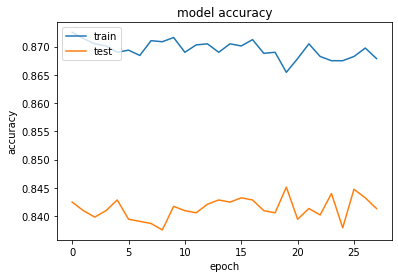

In [102]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

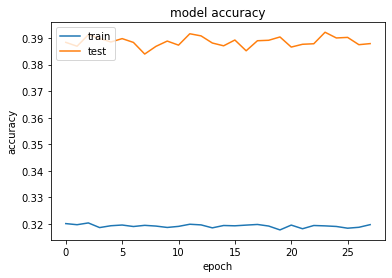

In [103]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [106]:
#Make Predictions

y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [108]:
#Make the confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [109]:
cm

array([[1529,   78],
       [ 224,  169]], dtype=int64)

In [111]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [112]:
score

0.849

In [ ]:
from sklearn.metrics import 

In [115]:
#Get weights
classifier.get_weights()

[array([[ 3.9962056e-01,  3.6506897e-01, -1.2744587e-02,  4.8279110e-02,
         -4.2292774e-03,  2.2326109e-01, -9.4109625e-03, -1.7688271e-01,
          1.5226717e-01,  1.6586727e-01, -4.5766407e-01],
        [-3.6558107e-01, -6.0679948e-01,  1.0530874e+00, -9.9568909e-01,
         -6.1081594e-01, -1.1176466e+00,  3.7737629e-01, -5.4566079e-01,
          7.1001306e-02, -1.2453418e-01, -1.0134344e+00],
        [-9.1314888e-01, -3.7591666e-01, -7.0982277e-02,  7.6742955e-02,
         -1.3884847e-01,  9.3095982e-03,  1.4592408e-01, -8.8176537e-01,
          1.3431087e-01, -1.1030372e-01,  1.0920815e-01],
        [-4.5570961e-01,  8.9755142e-01,  3.8030723e-01,  9.1453455e-02,
          6.9929659e-01,  3.1941488e-01, -1.2395792e-02,  1.6116920e-01,
         -4.0450343e-01,  4.8222843e-01,  3.3231369e-01],
        [ 1.0136025e+00, -6.5788156e-01,  4.9041852e-01,  2.2771847e-04,
         -2.6893440e-01, -5.0191101e-02, -1.4086862e+00, -3.0071563e-01,
          8.0406082e-01,  1.4703313e+0